**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
1,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026168,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
4,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229452,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.024801,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
2229453,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2229454,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2229455,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
1,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026463,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.027309,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
4,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743148,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.391426,1,1,1,0,0,0,1,0,1,0
743149,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
743150,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1
743151,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


---------------------------------------

**Create Model & Train Model**

In [5]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

In [6]:
x_columns = df_train.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_train["is_attack"].values)

x = df_train[x_columns].values
y = df_train["is_attack"].values
y = le.transform(y)

In [7]:
x_columns_val = df_test.columns.drop('is_attack')

le = LabelEncoder()
le.fit(df_test["is_attack"].values)

x_val = df_test[x_columns].values
y_val = df_test["is_attack"].values
y_val = le.transform(y_val)

In [8]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [9]:
x_test.shape,y_test.shape

((557365, 30), (557365,))

In [10]:
x_train.shape,y_train.shape

((1672092, 30), (1672092,))

In [11]:
x_val.shape, y_val.shape

((743153, 30), (743153,))

In [12]:
# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

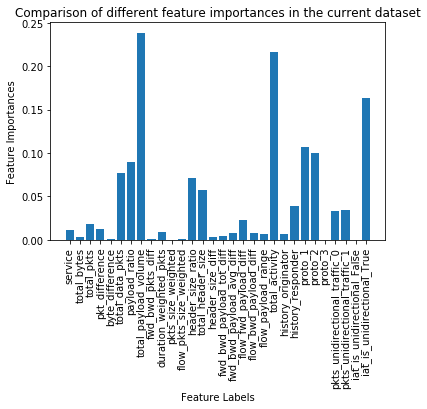

In [13]:
# Plot for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (70, 40)

plot.show()

In [14]:
# Define the model
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Define early stopping
monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Best_Model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=512, callbacks=[monitor, checkpoint])

Train on 1672092 samples, validate on 557365 samples
Epoch 1/100
1672092/1672092 [==============================] - 8s 5us/sample - loss: 0.0185 - accuracy: 0.9968 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 2/100
1672092/1672092 [==============================] - 7s 4us/sample - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 3/100
1672092/1672092 [==============================] - 7s 4us/sample - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 4/100
1672092/1672092 [==============================] - 7s 4us/sample - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 5/100
1672092/1672092 [==============================] - 7s 4us/sample - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 6/100
1672092/1672092 [==============================] - 7s 4us/sample - loss: 0.0048 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 7/100
1672092/1672092 [

Epoch 100/100
1672092/1672092 [==============================] - 14s 9us/sample - loss: 8.4560e-04 - accuracy: 0.9997 - val_loss: 0.0011 - val_accuracy: 0.9998


In [15]:
# Load the best saved model
best_model = load_model('Best_Model.h5')

# Evaluate the best saved model
score = best_model.evaluate(x_val, y_val)
print('')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

743153/743153 [==============================] - 27s 36us/sample - loss: 7.7428e-04 - accuracy: 0.9997

Test loss: 0.0007742835410105245
Test accuracy: 0.99972683


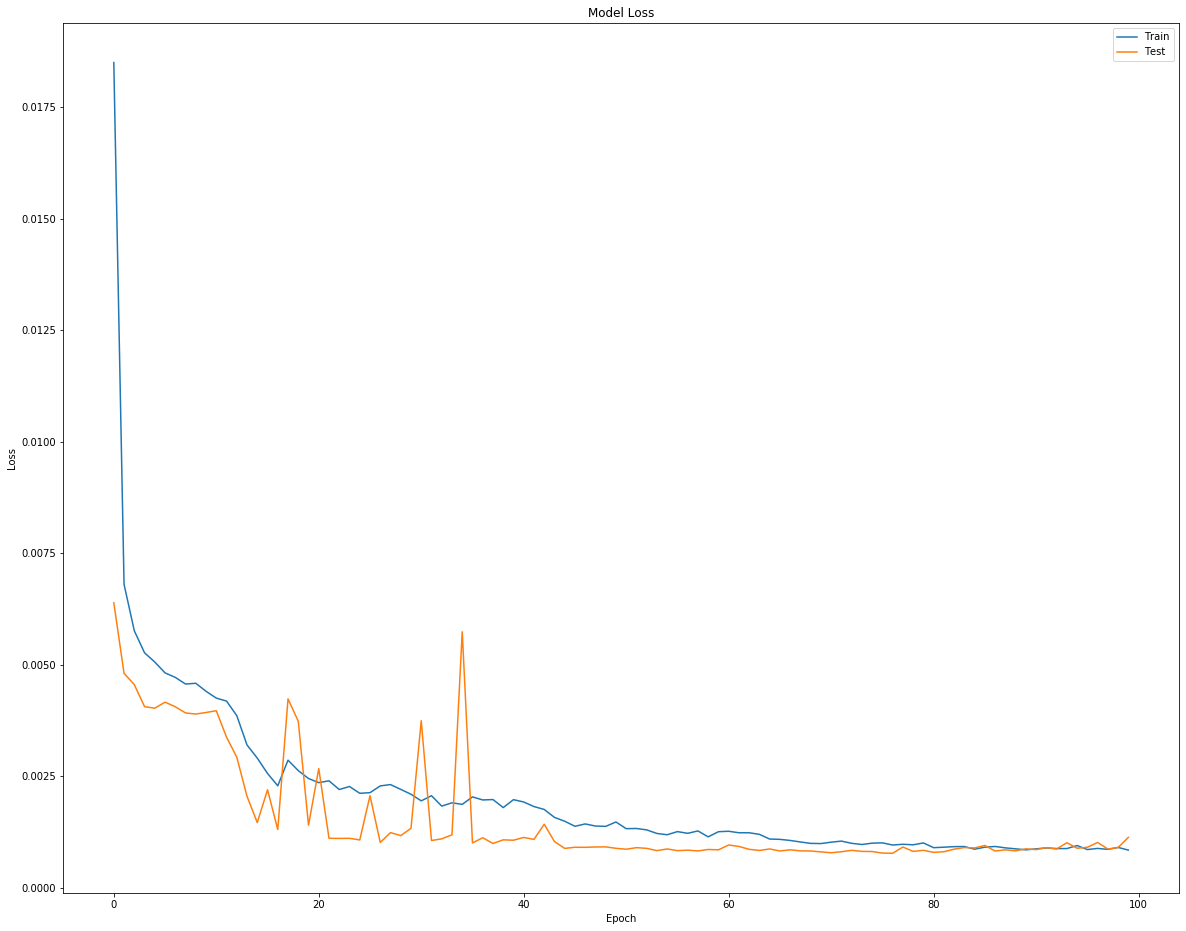

In [16]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

-------------------------------------

## Results

In [17]:
pred = model.predict(x_val)

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


def calculate_metrics(modelName, yTrue, yPred, average='binary'):
    """
    Calculate and print the performance metrics of a classification model.
    
    Parameters:
    modelName (str): The name of the classification model.
    yTrue (array-like): The true labels.
    yPred (array-like): The predicted labels.
    average (str or None, optional): The averaging method to use for multi-class classification. One of 
        {'micro', 'macro', 'weighted', 'binary'} or None (default: 'binary'). If None, only binary 
        classification metrics will be computed.
    
    Raises:
    ValueError: If `average` is not one of {'micro', 'macro', 'weighted', 'binary'} or None.
    
    """    
    # Check if average parameter is valid
    if average != 'micro' and average != 'macro' and average != 'weighted' and average != 'binary' and average != None:
        print("Average must be one of this options: {‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’")
        return
    
    # Prints the name of the model and calculate accuracy and precision
    print(f"--- Performance of {modelName} ---")
    acc = accuracy_score(y_true = yTrue, y_pred = yPred)
    precision = precision_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Accuracy : {np.round(acc*100,2)}%\nPrecision: {np.round(precision*100,2)}%')
    
    # Calculates and print recall and F1-score
    f1 = f1_score(y_true = yTrue, y_pred = yPred, average = average)
    recall = recall_score(y_true = yTrue, y_pred = yPred, average = average)
    print(f'Recall: {np.round(recall*100,2)}%\nF1-score: {np.round(f1*100,2)}%')
    
    #auc_sklearn = roc_auc_score(y_true = yTrue, y_score = yPred, average = average)
    #print(f'Roc auc: {np.round(auc_sklearn*100,2)}%')
    
    # Calculates and prints balanced accuracy and classification report
    print(f"Balanced accuracy: {np.round(balanced_accuracy_score(yTrue, yPred)*100,2)}%")
    print(f"Classification report:\n{classification_report(yTrue, yPred)}")

In [19]:
pred = np.round(pred).astype(int)
calculate_metrics("Binary - DNN", y_val, pred)

--- Performance of Binary - DNN ---
Accuracy : 99.97%
Precision: 99.99%
Recall: 99.98%
F1-score: 99.98%
Balanced accuracy: 99.97%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    176233
           1       1.00      1.00      1.00    566920

    accuracy                           1.00    743153
   macro avg       1.00      1.00      1.00    743153
weighted avg       1.00      1.00      1.00    743153



In [20]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [21]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [22]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal', 'Malicious'])

    # Plot size
    fig, ax = plt.subplots(figsize=(4,4))
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=10, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=10, fontsize=11)
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Normal', 'Malicious'])
    ax.set_yticklabels(['Normal', 'Malicious'])
    
    ax.tick_params(axis='x', pad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', va='center')
    ax.tick_params(axis='y', pad=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)    

In [24]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Decision Tree Classifier
Accuracy: 0.9997160746172054
Recall: 0.9997160746172054
Precision: 0.999716115929885
F1-Score: 0.9997160887697443

[CMATRIX] Decision Tree Confusion Matrix


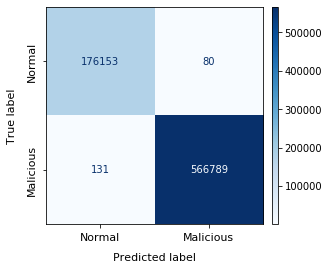

In [25]:
print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_val, pred)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, pred, 1)